Data Import and Preprocessing 

In [13]:
import nltk
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [14]:
poems_dir = 'C:/Users/natal/Downloads/Final-Natalie/data/poems/'

def load_poem(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

poems = {
    'Wild Nights – Wild Nights!': load_poem(os.path.join(poems_dir, 'Wild_Nights__Wild_Nights.txt')),
    'I cannot live with You': load_poem(os.path.join(poems_dir, 'I_cannot_live_with_You.txt')),
    'Because I could not stop for Death': load_poem(os.path.join(poems_dir, 'Because_I_could_not_stop_for_Death.txt')),
    'I died for beauty, but was scarce': load_poem(os.path.join(poems_dir, 'I_died_for_beauty_but_was_scarce.txt')),
    'A narrow Fellow in the Grass': load_poem(os.path.join(poems_dir, 'A_narrow_Fellow_in_the_Grass.txt'))
}

for title, content in poems.items():
    print(f"Title: {title}\n{content}\n")


Title: Wild Nights – Wild Nights!
Wild Nights – Wild Nights!
Were I with thee,
Wild Nights should be
Our luxury!

Futile – the winds –
To a heart in port –
Done with the compass –
Done with the chart!

Rowing in Eden –
Ah, the sea!
Might I but moor – tonight –
In thee!


Title: I cannot live with You
I cannot live with You – 
It would be Life – 
And Life is over there – 
Behind the Shelf

The Sexton keeps the Key to – 
Putting up
Our Life – His Porcelain – 
Like a Cup – 

Discarded of the Housewife – 
Quaint – or Broke – 
A newer Sevres pleases – 
Old Ones crack – 

I could not die – with You – 
For One must wait
To shut the Other’s Gaze down – 
You – could not – 

And I – could I stand by
And see You – freeze – 
Without my Right of Frost – 
Death's privilege?

Nor could I rise – with You – 
Because Your Face
Would put out Jesus’ – 
That New Grace

Glow plain – and foreign
On my homesick Eye – 
Except that You than He
Shone closer by – 

They’d judge Us – How – 
For You – served Heaven

Sentiment Analyze

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...


In [10]:
def analyze_sentiment_vader(text):
    scores = sia.polarity_scores(text)
    polarity = scores['compound'] 
    return polarity, (scores['pos'], scores['neu'], scores['neg'])

sentiment_results = {}
for title, content in poems.items():
    polarity, (pos, neu, neg) = analyze_sentiment_vader(content)
    sentiment_results[title] = {'Polarity': polarity, 'Positive': pos, 'Neutral': neu, 'Negative': neg}

sentiment_results_df = pd.DataFrame(sentiment_results).T
print(sentiment_results_df)

                                    Polarity  Positive  Neutral  Negative
Wild Nights – Wild Nights!           -0.4798     0.000    0.926     0.074
I cannot live with You                0.9427     0.158    0.750     0.092
Because I could not stop for Death    0.0943     0.044    0.922     0.033
I died for beauty, but was scarce     0.0258     0.131    0.753     0.116
A narrow Fellow in the Grass          0.4854     0.058    0.920     0.022


Visualization 

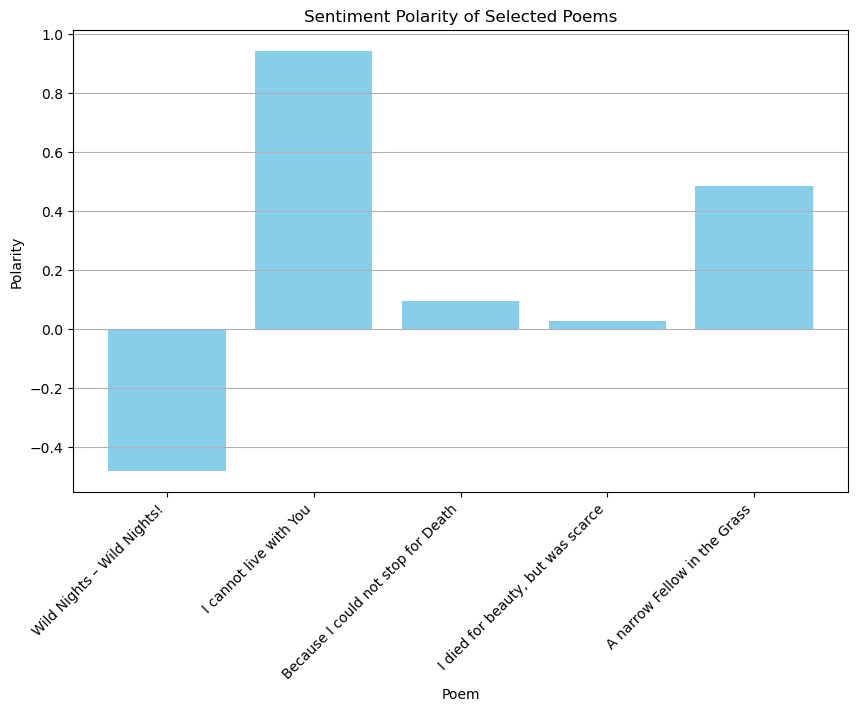

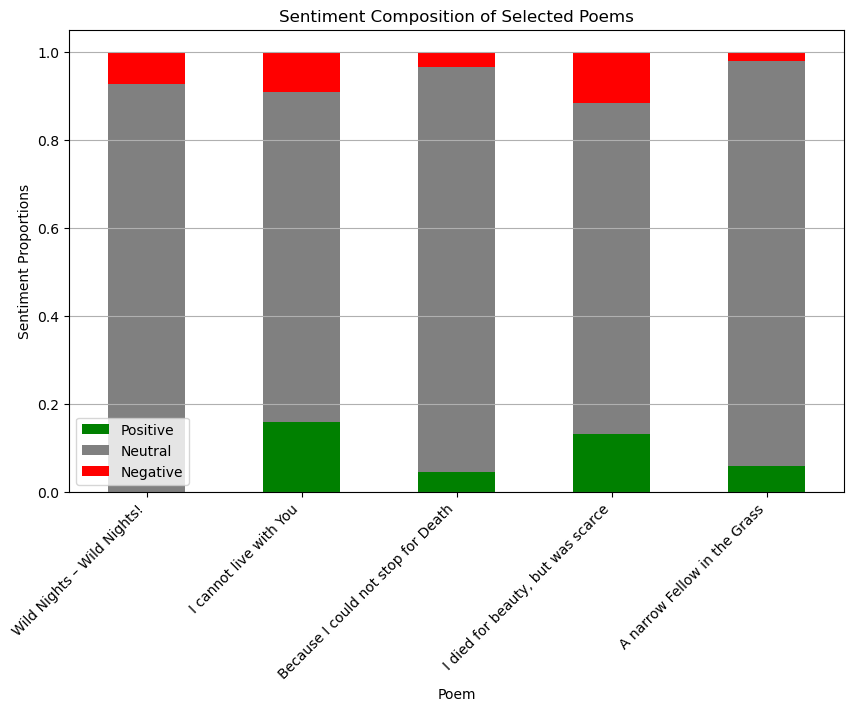

In [11]:
# Plotting the sentiment polarity
plt.figure(figsize=(10, 6))
plt.bar(sentiment_results_df.index, sentiment_results_df['Polarity'], color='skyblue')
plt.title('Sentiment Polarity of Selected Poems')
plt.xlabel('Poem')
plt.ylabel('Polarity')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Plotting the positive, neutral, and negative sentiments
sentiment_results_df[['Positive', 'Neutral', 'Negative']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'grey', 'red'])
plt.title('Sentiment Composition of Selected Poems')
plt.xlabel('Poem')
plt.ylabel('Sentiment Proportions')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()
